In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from IPython.display import display


# need to find a way to store/retrieve this dataset online
data_folder = "kaggledownload/"
file_path = os.path.join(data_folder, "shots_2007-2022.csv")

if os.path.exists(file_path):
    df_full = pd.read_csv(file_path)
    print(df_full.head())
else:
    print(f"file not found: {file_path}. check the contents of '{data_folder}'.")
    print(f"available files in '{data_folder}': {os.listdir(data_folder)}")

# filter to shots taken during regular season play by the Tampa Bay Lightning
df = df_full[(df_full['teamCode'] == 'TBL')&(df_full['isPlayoffGame'] == 0)]

file not found: kaggledownload/shots_2007-2022.csv. check the contents of 'kaggledownload/'.


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'kaggledownload/'

## Shot Angle and Distance - Basic Analysis
I want to look at the angle of the shot and the distance from the net to see how goal percentage is related.  Of course, there are always other variables to consider but for now we'll keep it simple.

-0.7812478082877514
-1.139507108687823


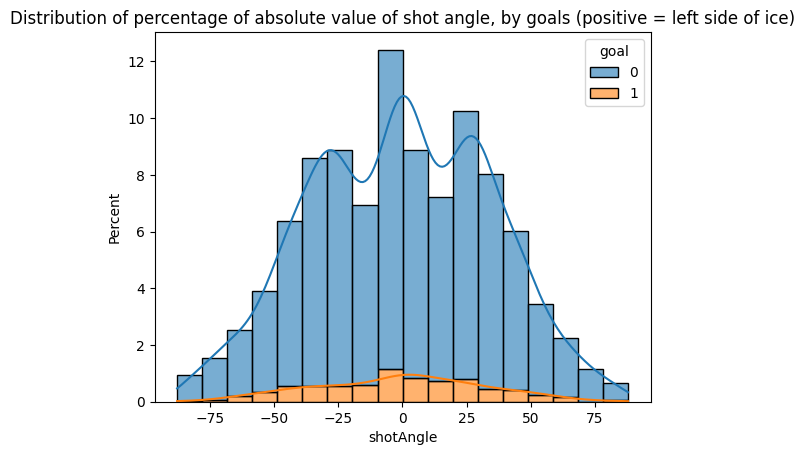

In [45]:
import seaborn as sns

sns.histplot(data = df, x = "shotAngle", kde=True,  alpha = 0.6, bins = 18, hue = 'goal', multiple = "stack", stat = "percent")
plt.title('Distribution of percentage of absolute value of shot angle, by goals (positive = left side of ice)')

goals = df[df['goal'] == 1]

print(df['shotAngle'].mean())
print(goals['shotAngle'].mean())

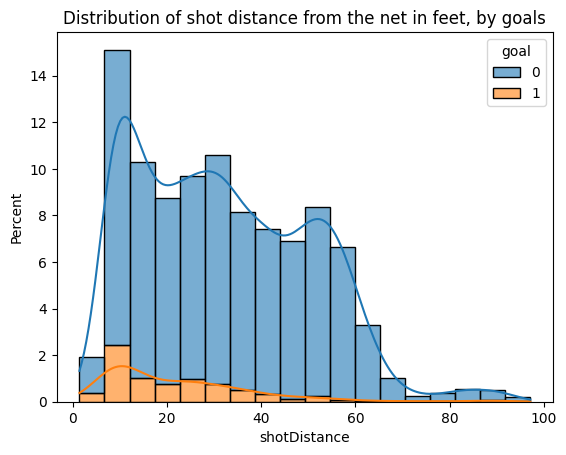

In [41]:
sns.histplot(df, x = "shotDistance", kde=True, alpha = 0.6, bins = 18, hue = 'goal', multiple = "stack", stat = "percent")
plt.title('Distribution of shot distance from the net in feet, by goals');

A few things: 
1. Most shots are taken from the right side of the ice (median = -2.3deg), but a higher percentage of goals are from the left side of the ice (median=3.1deg). It might be interesting to further analyze handedness of shooters and goalies.
2. Most shots are within 45deg of center.  Shots and goals dramatically drop off outside of 45deg.
3. Most shots and goals come from between 5 and 15ft from the net.  The average shot is from outside of 30ft and the average goal is 22ft.  It might be interesting to further analyze with rebound data.

## Spatial Analysis of shots
x and y coordinate data

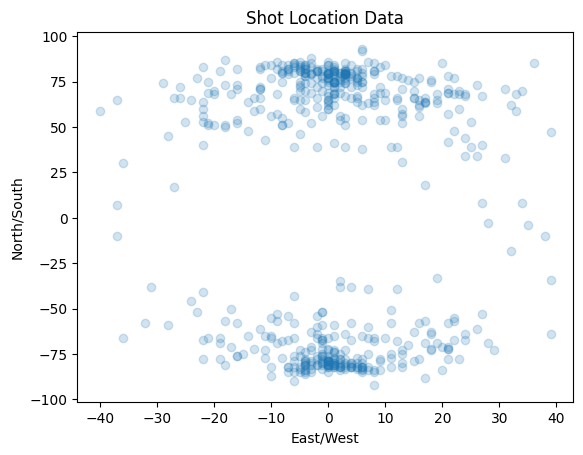

In [42]:
plt.scatter(goals["yCord"],goals["xCord"], alpha = 0.2)
plt.xlabel("East/West")
plt.ylabel("North/South")
plt.title("Shot Location Data")
plt.show()

### Decision Tree